# Geodata Preparation

In [42]:
import pandas as pd, geopandas as gpd, numpy as np

In [2]:
stadtteile = gpd.read_file("../assets/geodata/stadtteile.geojson")

<AxesSubplot:>

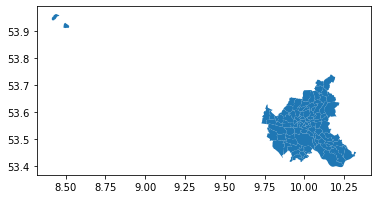

In [5]:
stadtteile.plot()

In [2]:
print("Hello")

Hello


In [14]:
stadtteilprofile = pd.read_excel("../assets/data/Stadtteilprofile2021.xlsx", header = 1, index_col = 0)

In [16]:
stadtteilprofile.columns

Index(['Bevölkerung', 'Unter 18-Jährige', 'Anteil der unter 18-Jährigen in %',
       ' 65-Jährige und Ältere', 'Anteil der 65-Jährigen und Älteren in %',
       'Ausländer:innen', 'Anteil der Ausländer:innen in %',
       'Bevölkerung mit Migrations-hintergrund',
       'Anteil der Bevölkerung mit Migrations-hintergrund in %',
       'Unter 18-Jährige mit Migrations-hintergrund',
       'Anteil der unter 18-Jährigen mit Migrations-hintergrund in %',
       'Haushalte', 'Personen je Haushalt', 'Einpersonen-haushalte',
       'Anteil der Einpersonen-haushalte in %', 'Haushalte mit Kindern',
       'Anteil der Haushalte mit Kindern in %', 'Alleinerziehende',
       'Anteil der Haushalte von Alleinerziehenden in %', 'Fläche in km²',
       'Bevölkerungs-dichte', 'Geburten', 'Sterbefälle', 'Zuzüge', 'Fortzüge',
       'Wanderungssaldo',
       'Sozial-versicherungs-pflichtig Beschäftigte (Dez 2020)',
       'Beschäftigten-quote in % (Dez 2020)', 'Arbeitslose (Dez 2020)',
       'Arbeitslos

In [20]:
stadtteile = stadtteile.set_index("stadtteil_name")

In [21]:
stadtteile

,id,stadtteil_schluessel,bezirk,bezirk_name,stadtteil_nummer,geometry
stadtteil_name,,,,,,
Hamburg-Altstadt,APP_STADTTEILE_1,02101,1,Hamburg-Mitte,101,"MULTIPOLYGON (((10.00603 53.54850, 10.00704 53..."
HafenCity,APP_STADTTEILE_2,02102,1,Hamburg-Mitte,102,"MULTIPOLYGON (((9.99864 53.53696, 9.99737 53.5..."
Neustadt,APP_STADTTEILE_3,02103,1,Hamburg-Mitte,103,"MULTIPOLYGON (((9.99383 53.55239, 9.99213 53.5..."
St. Pauli,APP_STADTTEILE_4,02104,1,Hamburg-Mitte,104,"MULTIPOLYGON (((9.96336 53.54434, 9.96233 53.5..."
St. Georg,APP_STADTTEILE_5,02105,1,Hamburg-Mitte,105,"MULTIPOLYGON (((10.01230 53.54985, 10.01210 53..."
...,...,...,...,...,...,...
Hausbruch,APP_STADTTEILE_100,02713,7,Harburg,713,"MULTIPOLYGON (((9.89393 53.47177, 9.89387 53.4..."
Neugraben-Fischbek,APP_STADTTEILE_101,02714,7,Harburg,714,"MULTIPOLYGON (((9.85078 53.43952, 9.85041 53.4..."
Francop,APP_STADTTEILE_102,02715,7,Harburg,715,"MULTIPOLYGON (((9.88042 53.51673, 9.88049 53.5..."


In [70]:
stadtteile_einkuenfte = pd.read_csv("../assets/data/Stadtteil_Einkünfte.csv", sep=";", index_col="Bezirk Stadtteil Land" )
stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Mittelwert)"] = pd.to_numeric(stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Mittelwert)"], errors="coerce")
stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"] = pd.to_numeric(stadtteile_einkuenfte["Gesamtbetrag der Einkünfte (Median)"], errors="coerce")

#stadtteile_einkuenfte

In [71]:
stadtteile_einkuenfte.dtypes

Gesamtbetrag d Einkünfte (1000€)                                     object
Festgesetzte Einkommensteuer/Jahreslohnsteuer (Steuerpflichtige)      int64
Festgesetzte Einkommensteuer/Jahreslohnsteuer (1000 Euro)            object
Gesamtbetrag der Einkünfte (Mittelwert)                             float64
Gesamtbetrag der Einkünfte (Median)                                 float64
dtype: object

In [72]:
stadtteile_einkuenfte = stadtteile.merge(stadtteile_einkuenfte, left_index=True, right_index=True)

<AxesSubplot:>

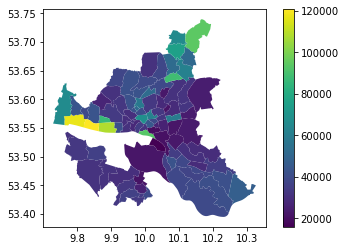

In [73]:
stadtteile_einkuenfte.plot(column = "Gesamtbetrag der Einkünfte (Mittelwert)", legend= True)